In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
from scipy.interpolate import interp1d
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
import pandas as pd

# Chapter 6/7: Convective flow over a flat plate
Water at 300$^o$C flows over an isothermal flat plate in parallel flow:

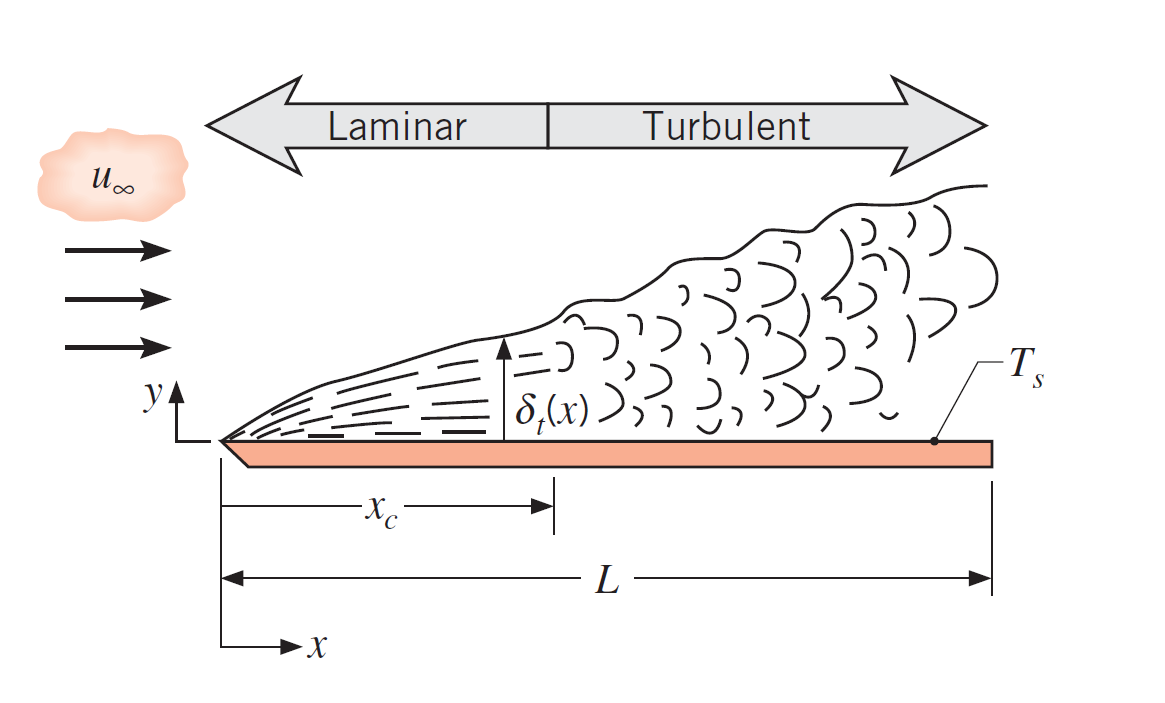

You are asked to:
- (a) Plot the variation in local heat transfer coefficient, with distance $h_x(x)$ assuming the flow is (i) fully turbulent and (ii) fully laminar. You are also to indicate the transition point.
- (b) Plot the variation in average heat transfer coefficient $\bar{h}_x(x)$ with distance for the mixed boundary case.

### Assumptions:
- 2-D flow over a flat plate ($L$ = 1.0 m)
- constant properties (i.e., $k$'s)
- isothermal plate, $T_s$ = 27$^o$C

### Analysis:
#### Part(a):

The equations for local heat transfer coefficient are as follows:

Laminar, Eq 7.23:

$$
h_{x,Lam} = \frac{k}{x}0.332 Re^{1/2}Pr^{1/3}
$$

Turbulent, Eq. 7.36:

$$
h_{x,Turb} = \frac{k}{x}0.0296 Re^{4/5}Pr^{1/3}
$$

...and the transition oint occurs at $Re_c \approxeq$ 5x10$^5$, or $x_{crit} = \frac{Re \mu}{\rho U_\infty} = 0.214$ m.

#### Part (b)
For part b, we need to integrate $h$ over the length to find the average such that: $\bar{h}_x = \frac{1}{x}\int^x_0 h_x dx$:

...where the laminar region can be described by:
$$
\bar{Nu}_{x,Lam} = \frac{\bar{h}x}{k} = 0.664 Re_x^{1/2}Pr^{1/3}
$$

...and the mixed region is given by:
$$
\bar{Nu}_L = \frac{\bar{h}L}{k} = \left(0.037 Re_L^{4/5}-A\right)Pr^{1/3}
$$
...where $A = 0.037 Re^{4/5}_{c} - 0.664 Re^{1/2}_c = 871.3$ for flat plate where $Re_c \approxeq$ 5x10$^5$. Note that inherent in this equation is the assumption of an abrupt transition at the critical value.

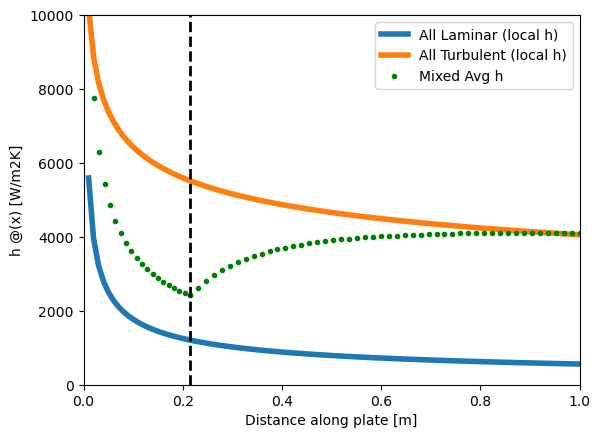

For the total plate length of 1 m, the h_L is 4110 W/m2K


In [2]:
# Water(liq) flows over an isothermal flat plate in parallel flow:

Tinf = 27 + 273.15  # [K]
Uinf = 2  # [m/s]
Re_cr = 5e5  # critical Re for a flat plate

# Since Ts is not given, use properties at Tinf (300K)
rho = 997  # [kg/m3]
mu = 855e-6  # [Ns/m2]
k = 0.613  # [W/mK] thermal conductivity
cp = 4179  # [J/kgK]
Pr = 5.83

# Reynolds number as fxn of (x) @ fixed velocity
def fRex(x):
    return rho * Uinf * x / mu

# Part (a) Local h equations as fxn of (x)
def fL_h(x):
    return k / x * 0.332 * fRex(x) ** 0.5 * Pr ** (1/3)  # Eq 7.23

def fT_h(x):
    return k / x * 0.0296 * fRex(x) ** 0.8 * Pr ** (1/3)  # Eq 7.36

Rec = 5e5  # critical reynolds number for flat plate
xTran = Rec * mu / (rho * Uinf)
ptT = [fL_h(xTran), fT_h(xTran)]  # line showing transition point

# Part (b) average h equations as fxn of (x)
def fL_hh(x):
    return k / x * 0.664 * fRex(x) ** 0.5 * Pr ** (1/3)  # Eq 7.30

A = 0.037 * Rec ** 0.8 - 0.664 * Rec ** 0.5  # Eq 7.39

def ftran_h(x):
    return k / x * (0.037 * fRex(x) ** 0.8 - A) * Pr ** (1/3)  # Eq 7.38

# Plotting part (a)
x1 = linspace(0.01,1,100)  # distance along plate [m]
h_lam = fL_h(x1)  # laminar local h
h_turb = fT_h(x1)  # turbulent local h

# Plotting part (b)
x2 = linspace(0.01, xTran, 20)  # distance along plate up to transition [m]
ha_lam = fL_hh(x2)  # laminar local h
x3 = linspace(xTran, 1)  # from transition on [m]
ha_turb = ftran_h(x3)  # turbulent local h

plt.figure(1)
plt.xlabel('Distance along plate [m]'); plt.xlim([0, 1])
plt.ylabel('h @(x) [W/m2K]'); plt.ylim([0, 10000])
plt.plot(x1, h_lam, linewidth=4)
plt.plot(x1, h_turb, linewidth=4)
plt.plot(x2,ha_lam,'.g', linewidth=2);
plt.plot(x3,ha_turb,'.g', linewidth=2);
plt.axvline(x=xTran, linestyle='--', linewidth=2, color='black')
plt.legend(['All Laminar (local h)', 'All Turbulent (local h)','Mixed Avg h'])
plt.show()

# plt.figure(2)
# plt.xlabel('Distance along plate [m]'); 
# plt.xlim([0, 1])
# plt.ylabel('Avg h @(x) [W/m2K]'); 
# plt.ylim([0, 10000]);
# plt.plot(x2,ha_lam,linewidth=4);
# plt.plot(x3,ha_turb,linewidth=4);
# plt.show()

print(f'For the total plate length of 1 m, the h_L is {ftran_h(1):0.0f} W/m2K')